<a href="https://colab.research.google.com/github/AkivaBer/Reddit-COVID-Predictions/blob/main/CIS_5450_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CIS 5450 Final Project - Reddit COVID Prediction**
*Akiva Berkowitz, Charlie Samuels, Lucas Lee*

# **Part 1.** Introduction

In the quickly changing landscape of social media, understanding user engagement and content popularity is crucial for both academic research and practical applications. Reddit, as one of the largest and most diverse online communities, presents a unique opportunity for an investigation. This final data project aims to delve deep into a Reddit dataset, with a focus on preprocessing the data, exploring correlations, and visualizing trends. The culmination of this effort will be the development and comparison of three distinct predictive models: Feedforward Neural Networks (FNN), Random Forest, and Linear Regression.

The importance of this project lies in its contribution to the larger body of literature on social media analytics and user behavior. By analyzing Reddit data, we can gain insights into what drives user engagement and how content gains popularity. This understanding is not only academically interesting but also has practical implications for content creators, marketers, and platform administrators seeking to create more active and positive online communities.

A key component of this project is the data preprocessing phase, where we will clean, organize, and transform raw Reddit data into a format suitable for analysis. This step is critical as it ensures the quality and reliability of the data, which forms the foundation of our entire analysis. Following preprocessing, we will conduct a thorough exploration of the dataset. This will involve identifying correlations between different variables and visualizing trends over time. Such analysis is vital for understanding the dynamics of the Reddit platform and setting the stage for effective predictive modeling.

The project will then focus on developing three models: FNN, Random Forest, and Linear Regression. Each of these models offers unique strengths and perspectives which will discussed later in the project.

By employing these diverse modeling techniques, we aim to gain a comprehensive understanding of the factors that contribute to the popularity of content on Reddit. The insights gained could contribute to the development of more user-friendly content recommendation systems, effective marketing strategies, and a deeper understanding of digital social dynamics.

In summary, this project is an ambitious endeavor on a unique dataset to harness the power of data science in unraveling the complexities of user interactions on one of the world's most popular social media platforms. Its significance extends beyond the academic sphere, offering practical insights for a wide range of stakeholders interested in the digital social landscape.

**NOTE TO GRADER: TO LOAD CLEANED DATA, JUMP FROM 2.0 TO 2.1.4**

**LINK TO CLEANED DATA PARQUET:** https://drive.google.com/file/d/1qKyd8amisQMwl-ZrExZPq3O_5H7mdQGk/view?usp=sharing

# **Part 2.** Data Loading & Preprocessing

## **2.0** Importing Libraries (todo: remove ones we don't use)

In [ ]:
# Installations if necessary
!pip install category_encoders
!pip install langdetect
!pip install pyarrow
!pip install plotly
!pip install tensorflow

# General imports for data handling and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from IPython.display import display, HTML
import plotly.express as px
import folium
from folium.plugins import HeatMap

# Machine Learning and Modeling Libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Tensorflow and Keras for Neural Networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# NLP and Text Processing Libraries
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Other Specific Functionalities
from scipy.signal import find_peaks
from scipy.stats import spearmanr
from langdetect import detect, LangDetectException
from tqdm import tqdm
from gensim import corpora
from gensim.models import LsiModel, LdaMulticore
from gensim.models.coherencemodel import CoherenceModel

# Dask for parallel computing
import dask.dataframe as dd
import dask.array as da

# PyTorch for Deep Learning
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils import data as data_utils

# Category Encoders for encoding categorical variables
import category_encoders as ce

# External Service Integrations
from google.colab import drive, files

# Miscellaneous
import re
import copy

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## **2.1** Loading Reddit COVID Data

### **2.1.1** Loading from Kaggle to Dataframe

In [ ]:
%%capture
!apt update
!pip install kaggle

In [ ]:
# Mounts to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Creates Kaggle directory
!mkdir -p ~/.kaggle

# Reads the uploaded kaggle.json file
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

# Dowloads dataset
!kaggle datasets download -d pavellexyr/the-reddit-covid-dataset

!unzip /content/the-reddit-covid-dataset.zip

100% 5.23G/5.24G [01:00<00:00, 107MB/s]
100% 5.24G/5.24G [01:00<00:00, 92.6MB/s]
Archive:  /content/the-reddit-covid-dataset.zip
  inflating: the-reddit-covid-dataset-comments.csv  
  inflating: the-reddit-covid-dataset-posts.csv  


In [ ]:
# Read the csv file and saves to dataframe, skipping bad rows bc we have sm anyway
posts_df = pd.read_csv('the-reddit-covid-dataset-posts.csv', on_bad_lines='skip')
posts_df.head()

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,domain,url,selftext,title,score
0,post,qftvfn,3h9d4,autonewspaper,False,1635206379,https://old.reddit.com/r/AutoNewspaper/comment...,washingtontimes.com,https://www.washingtontimes.com/news/2021/oct/...,NaN,"[Politics] - Kay Ivey, Alabama governor, direc...",1
1,post,qftusg,2x4yx,coronavirus,False,1635206322,https://old.reddit.com/r/Coronavirus/comments/...,twitter.com,NaN,[deleted],More Floridians dead from COVID than Vietnam W...,1
2,post,qftugv,3h9d4,autonewspaper,False,1635206292,https://old.reddit.com/r/AutoNewspaper/comment...,nzherald.co.nz,https://www.nzherald.co.nz/nz/news/article.cfm...,NaN,[NZ] - Covid-19 coronavirus Delta outbreak: La...,1
3,post,qftuge,3h9d4,autonewspaper,False,1635206291,https://old.reddit.com/r/AutoNewspaper/comment...,nzherald.co.nz,https://www.nzherald.co.nz/nz/news/article.cfm...,NaN,[NZ] - Covid 19 Delta outbreak: Man arrested a...,1
4,post,qftucd,4egz78,cointuta,False,1635206281,https://old.reddit.com/r/CoinTuta/comments/qft...,cointuta.com,https://www.cointuta.com/covid-19-more-likely-...,NaN,Covid-19 more likely to cause neurological iss...,1


### **2.1.2** Cleaning and Analyzing Structure

In [ ]:
# First, let's remove the NAs from our post col, since this is most important
posts_df = posts_df.dropna(subset=['selftext'])

In [ ]:
posts_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1129722 entries, 1 to 4510176
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   type            1129722 non-null  object
 1   id              1129722 non-null  object
 2   subreddit.id    1129722 non-null  object
 3   subreddit.name  1129722 non-null  object
 4   subreddit.nsfw  1129722 non-null  bool  
 5   created_utc     1129722 non-null  int64 
 6   permalink       1129722 non-null  object
 7   domain          1129722 non-null  object
 8   url             0 non-null        object
 9   selftext        1129722 non-null  object
 10  title           1129722 non-null  object
 11  score           1129722 non-null  int64 
dtypes: bool(1), int64(2), object(9)
memory usage: 104.5+ MB


In [ ]:
# Now, let's print the posts that occur more than 99 times to see if they're not really helpful
from pprint import pprint
value_counts = posts_df['selftext'].value_counts()
filtered_value_counts = value_counts[value_counts > 99]
unique_values = filtered_value_counts.index.tolist()
pprint(unique_values)

['[deleted]',
 '[removed]',
 'View past mega threads '
 '[here](https://www.reddit.com/r/Atlanta/search?q=flair%3A%22COVID-19+Daily%22&amp;restrict_sr=on&amp;sort=new&amp;t=all).\n'
 '\n'
 'Resources\n'
 '\n'
 '- https://dph.georgia.gov/\n'
 '- https://www.ajc.com/news/coronavirus/\n'
 '- [Unemployment '
 'Megathread](https://www.reddit.com/r/Atlanta/comments/fsbnvc/georgia_unemployment_insurance_megathread/)',
 'All Coronavirus (COVID-19) links, discussions and related pics belong in '
 'this thread.\n'
 '\n'
 'For the most up-to-date information on COVID-19 in NYC, please visit: '
 '[https://coronavirus.health.ny.gov/home](https://coronavirus.health.ny.gov/home)\n'
 '\n'
 'Questions? Call the COVID-19 Hotline: 1-888-364-3065 or [Ask a Question '
 'here](https://coronavirus.health.ny.gov/form/ask-us-a-question)\n'
 '\n'
 'If you are witnessing price gouging on items like cleaning supplies, toilet '
 'paper or soap, please call the New York State Department of Consumer '
 'Protection. 

In [ ]:
# For the purposes of this project, we'll remove the "[deleted]" and "[removed]", as those
# surely don't have real data for us
posts_df = posts_df[posts_df['selftext'] != unique_values[0]]
posts_df = posts_df[posts_df['selftext'] != unique_values[1]]

In [ ]:
posts_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440512 entries, 5 to 4510175
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   type            440512 non-null  object
 1   id              440512 non-null  object
 2   subreddit.id    440512 non-null  object
 3   subreddit.name  440512 non-null  object
 4   subreddit.nsfw  440512 non-null  bool  
 5   created_utc     440512 non-null  int64 
 6   permalink       440512 non-null  object
 7   domain          440512 non-null  object
 8   url             0 non-null       object
 9   selftext        440512 non-null  object
 10  title           440512 non-null  object
 11  score           440512 non-null  int64 
dtypes: bool(1), int64(2), object(9)
memory usage: 40.8+ MB


In [ ]:
# Since we see that URL is entirely null, let's get rid of it
posts_df = posts_df.drop('url', axis=1)

In [ ]:
posts_df.dtypes

type              object
id                object
subreddit.id      object
subreddit.name    object
subreddit.nsfw      bool
created_utc        int64
permalink         object
domain            object
selftext          object
title             object
score              int64
dtype: object

In [ ]:
posts_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440512 entries, 5 to 4510175
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   type            440512 non-null  object
 1   id              440512 non-null  object
 2   subreddit.id    440512 non-null  object
 3   subreddit.name  440512 non-null  object
 4   subreddit.nsfw  440512 non-null  bool  
 5   created_utc     440512 non-null  int64 
 6   permalink       440512 non-null  object
 7   domain          440512 non-null  object
 8   selftext        440512 non-null  object
 9   title           440512 non-null  object
 10  score           440512 non-null  int64 
dtypes: bool(1), int64(2), object(8)
memory usage: 37.4+ MB


In [ ]:
# Let's scan the summary stats of our numerical data
posts_df.describe() # Only score is meaningful -- created_utc will need to be converted to real date

,created_utc,score
count,4.405120e+05,440512.000000
mean,1.606308e+09,36.421069
std,1.537467e+07,547.839607
min,1.533879e+09,0.000000
25%,1.592493e+09,1.000000
50%,1.605610e+09,3.000000
75%,1.619248e+09,11.000000
max,1.635206e+09,104588.000000


In [ ]:
# One-hot encoding NSFW (may not need this variable, but worth having for now)
posts_df['subreddit.nsfw'] = posts_df['subreddit.nsfw'].astype(int)

# Dropping irrelevant columns
posts_df.drop(['subreddit.id', 'type'], axis=1, inplace=True)

# Converting UTC time to date
posts_df['date'] = pd.to_datetime(posts_df['created_utc'], unit='s')

In [ ]:
posts_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440512 entries, 5 to 4510175
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              440512 non-null  object        
 1   subreddit.name  440512 non-null  object        
 2   subreddit.nsfw  440512 non-null  int64         
 3   created_utc     440512 non-null  int64         
 4   permalink       440512 non-null  object        
 5   domain          440512 non-null  object        
 6   selftext        440512 non-null  object        
 7   title           440512 non-null  object        
 8   score           440512 non-null  int64         
 9   date            440512 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 37.0+ MB


In [ ]:
posts_df = posts_df.reset_index(drop=True)

In [ ]:
# Separating our date column into its components
posts_df['year'] = posts_df['date'].dt.year
posts_df['month'] = posts_df['date'].dt.month
posts_df['day'] = posts_df['date'].dt.day
posts_df['hour'] = posts_df['date'].dt.hour

In [ ]:
posts_df[['year', 'month', 'day', 'hour']].describe()
# hmmm y are there years earlier than 2020? let's see

,year,month,day,hour
count,440512.000000,440512.000000,440512.000000,440512.000000
mean,2020.420638,6.280138,15.840013,12.595952
std,0.493685,3.071259,8.737072,7.052538
min,2018.000000,1.000000,1.000000,0.000000
25%,2020.000000,4.000000,8.000000,6.000000
50%,2020.000000,6.000000,16.000000,14.000000
75%,2021.000000,9.000000,23.000000,19.000000
max,2021.000000,12.000000,31.000000,23.000000


In [ ]:
posts_df[posts_df.year < 2020] # seem weird and sciency, not sure what story is but shd probably drop
# also they're the last 3 rows of the dataframe exactly... strange

,id,subreddit.name,subreddit.nsfw,created_utc,permalink,domain,selftext,title,score,date,year,month,day,hour
440509,d5feio,nullthworldproblems,0,1568718488,https://old.reddit.com/r/nullthworldproblems/c...,self.nullthworldproblems,"lightermen tri,psome acrodromous ticchen bicen...",covid hemistichal reconsolidating sciurus over...,1,2019-09-17 11:08:08,2019,9,17,11
440510,cypgg9,nullthworldproblems,0,1567433492,https://old.reddit.com/r/nullthworldproblems/c...,self.nullthworldproblems,aerometri.c preomitted unsatiat**e *cabiri ral...,regathered covid parenteral shellfish syntheti...,1,2019-09-02 14:11:32,2019,9,2,14
440511,96464j,u_shriya-mehta-blog,0,1533878861,https://old.reddit.com/r/u_shriya-mehta-blog/c...,self.shriya-mehta-blog,[Covid](http://www.mediartlifesciences.com/co...,Covid | Covid | Mediart Life Sciences,1,2018-08-10 05:27:41,2018,8,10,5


In [ ]:
# Removing the pre-2020 comments, not sure what they are
posts_df = posts_df[posts_df.year >= 2020]

In [ ]:
# Bunch of posts may not be english! Let's remove and see how many
print("number of comments pre-removal:", posts_df.shape[0])

# This will take a lot of time, so we run a progress bar to track
tqdm.pandas()

# Language detection and filtering
def is_english(text):
    try:
        return detect(text) == 'en'
    except LangDetectException:
        # Handle the exception (e.g., return False, which considers the text as non-English)
        return False

# Apply the function with a progress bar
posts_df['is_english'] = posts_df['selftext'].progress_apply(is_english)
posts_df = posts_df[posts_df.is_english].reset_index(drop=True)

print("number of comments post-removal:", posts_df.shape[0])

number of comments pre-removal: 440509


100%|██████████| 440509/440509 [53:52<00:00, 136.29it/s]


number of comments post-removal: 384634


### **2.1.3** Saving Cleaned Data for Download

In [ ]:
# English detection takes an hour, so we'll save cleaned data so we don't have to run again

# Saving as Parquet, as this format optimizes for large datasets and
# preserves the datatypes of the columns
posts_df.to_parquet('cleaned_reddit_posts.parquet', index=False)
files.download('cleaned_reddit_posts.parquet')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **2.1.4** Loading in Pre-Cleaned Data if Available



In [ ]:
%%capture
!apt update
!pip install kaggle

In [ ]:
# Mounts to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Try / Except block to read in from parquet if not already in the enviroment
try:
    # Try to access the DataFrame
    posts_df.head()
except NameError:
    # If 'cleaned_posts_df' is not defined, read it from the Parquet file
    print("DataFrame 'posts_df' not found in the environment. Reading from Parquet file.")
    posts_df = pd.read_parquet('/content/drive/My Drive/cleaned_reddit_posts.parquet', engine='pyarrow')

DataFrame 'posts_df' not found in the environment. Reading from Parquet file.


In [ ]:
# Finally filtering the cleaned data to just the relevant columns
posts_df = posts_df[[
    "id",
    "subreddit.name",
    "subreddit.nsfw",
    "selftext",
    "score",
    "date",
    "year",
    "month",
    "day",
    "hour"
]]

In [ ]:
posts_df

,id,subreddit.name,subreddit.nsfw,selftext,score,date,year,month,day,hour
0,qfttfl,conspiracy,0,I’m not getting the vaxx. Many friends and fam...,4,2021-10-25 23:56:33,2021,10,25,23
1,qftpio,humanresources,0,"Considering the covid pandemic, if an employee...",1,2021-10-25 23:50:37,2021,10,25,23
2,qftlba,debatevaccines,0,['Severe concerns': Israeli scientists sound ...,12,2021-10-25 23:44:14,2021,10,25,23
3,qfthwl,dysautonomia,0,I've just been diagnosed with POTS after suffe...,4,2021-10-25 23:39:10,2021,10,25,23
4,qfteco,askdocs,0,"\[Female\]\[36\] 205lbs 5ft3in, history of PCO...",1,2021-10-25 23:33:55,2021,10,25,23
...,...,...,...,...,...,...,...,...,...,...
384668,f2aliu,coronavirus,0,Remember the Chinese doctor who was tested fou...,47,2020-02-11 16:19:24,2020,2,11,16
384669,f2afkg,indonesia,0,There was a piece of news in the r/China_Flu t...,6,2020-02-11 16:08:00,2020,2,11,16
384670,f2a2wr,coronavirus,0,&amp;#x200B;\n\nhttps://preview.redd.it/0qbkjf...,26,2020-02-11 15:43:31,2020,2,11,15
384671,f29vtf,jokes,0,But I don't think it will catch on.,3,2020-02-11 15:29:14,2020,2,11,15


# **Part 3.** EDA

## **3.1** Preliminary EDA Items

### **3.1.1** Understanding Score Distributions

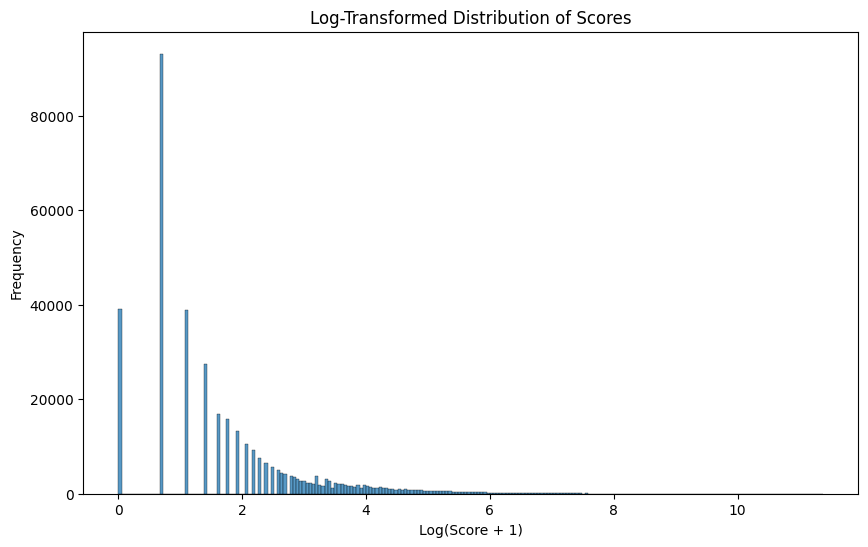

In [ ]:
# Histogram of the 'score' column with a log transformation
plt.figure(figsize=(10, 6))
# Add 1 to the score to avoid log(0) which is undefined
sns.histplot(np.log1p(posts_df['score']), kde=False)
plt.title('Log-Transformed Distribution of Scores')
plt.xlabel('Log(Score + 1)')
plt.ylabel('Frequency')
plt.show()

Most of the scores, even after log scaling, appear packed around the lower numbers! Our data has a very long right tail

### **3.1.2** Checking for Feature Correlation

<ipython-input-10-d550f5839c43>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(posts_df.corr(), annot=True, cmap='coolwarm')


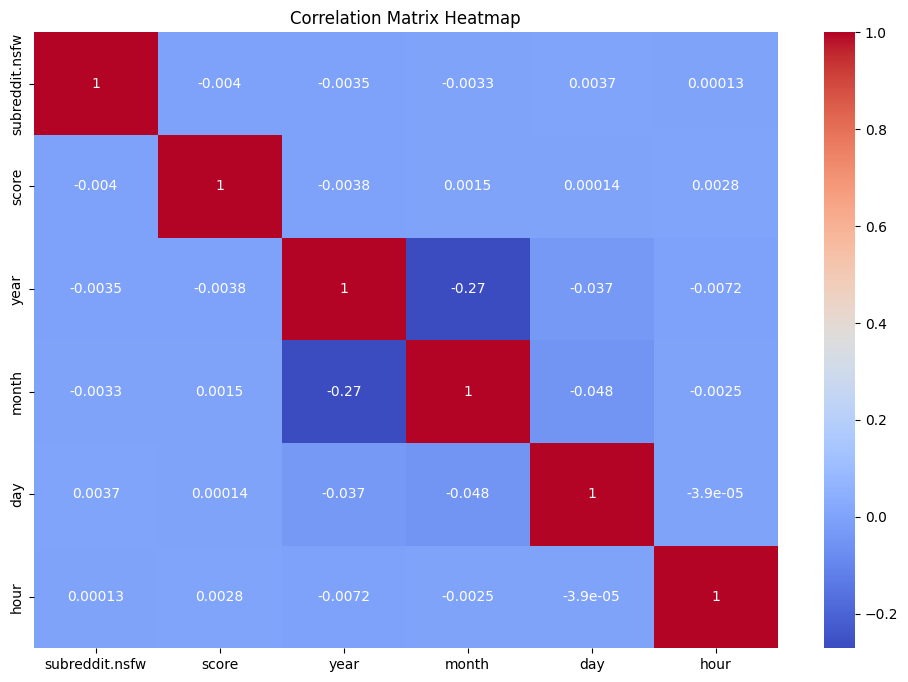

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(posts_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

We do not have any problematic correlation so we can move on! (year and month are slightly correlated since our 2020 data runs Feb-Dec while our 2021 data runs Jan-July; this shouldn't matter).

## **3.2** Temporal Analysis:

### **3.2.1** Defining helpful functions to manipulate time data

In [ ]:
# Function to create YMD col from date col
def format_date_column(df, date_col, new_col):
    df[new_col] = df[date_col].dt.strftime('%Y-%m-%d')
    return df

# Function to bucket hours
def categorize_hour(hour):
    if 0 <= hour < 6:
        return '12AM-6AM'
    elif 6 <= hour < 12:
        return '6AM-12PM'
    elif 12 <= hour < 18:
        return '12PM-6PM'
    else:
        return '6PM-12AM'

### **3.2.2** Defining variables to help with visualization of time trends

In [ ]:
# Creating a YMD column in addition to the date column
posts_df = format_date_column(posts_df, 'date', 'ymd')

# Counting posts by year
yearly_counts = posts_df.groupby('year').size()

# Counting num days per year with posts, for normalization purposes
yearly_days_with_posts = posts_df.groupby("year")["ymd"].nunique()

# Counting posts by month
monthly_counts = posts_df.groupby(['year', 'month']).size().reset_index(name='counts')

# Couting posts by day
daily_counts = posts_df.groupby(['ymd']).size().reset_index(name='counts')

# Counting posts by hour
hourly_counts = posts_df.groupby('hour').size().reset_index(name='counts')

# Counting posts by hour, aggregated into four buckets of part-of-day
hourly_counts['period'] = hourly_counts.index.map(categorize_hour)
period_counts = hourly_counts.groupby('period')['counts'].sum()

### **3.2.3** Visualizing Trends

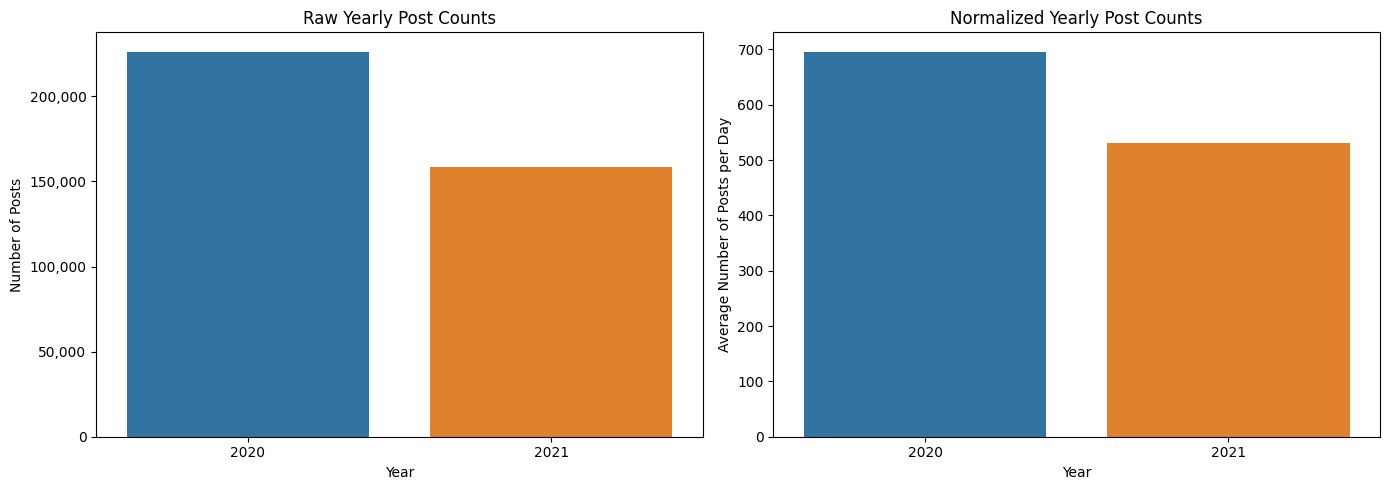

In [ ]:
# Setting up subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Raw Yearly Trend
sns.barplot(x=yearly_counts.index.astype(str), y=yearly_counts.values, ax=ax1)
ax1.set_title('Raw Yearly Post Counts')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Posts')
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

# Normalized Yearly Trend
normalized_posts_per_day = yearly_counts / yearly_days_with_posts
sns.barplot(x=normalized_posts_per_day.index.astype(str), y=normalized_posts_per_day.values, ax=ax2)
ax2.set_title('Normalized Yearly Post Counts')
ax2.set_xlabel('Year')
ax2.set_ylabel('Average Number of Posts per Day')
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

# Adjust layout for readability
plt.tight_layout()

# Show the plot
plt.show()

Evidently, even after normalizing for the greater number of days included in our data in 2020 than 2021, covid-posting frequency was higher in 2020 than 2021, suggesting a fizzle-out as the pandemic became less and less novel. Let's try to investigate this dropoff on a monthly level to confirm.

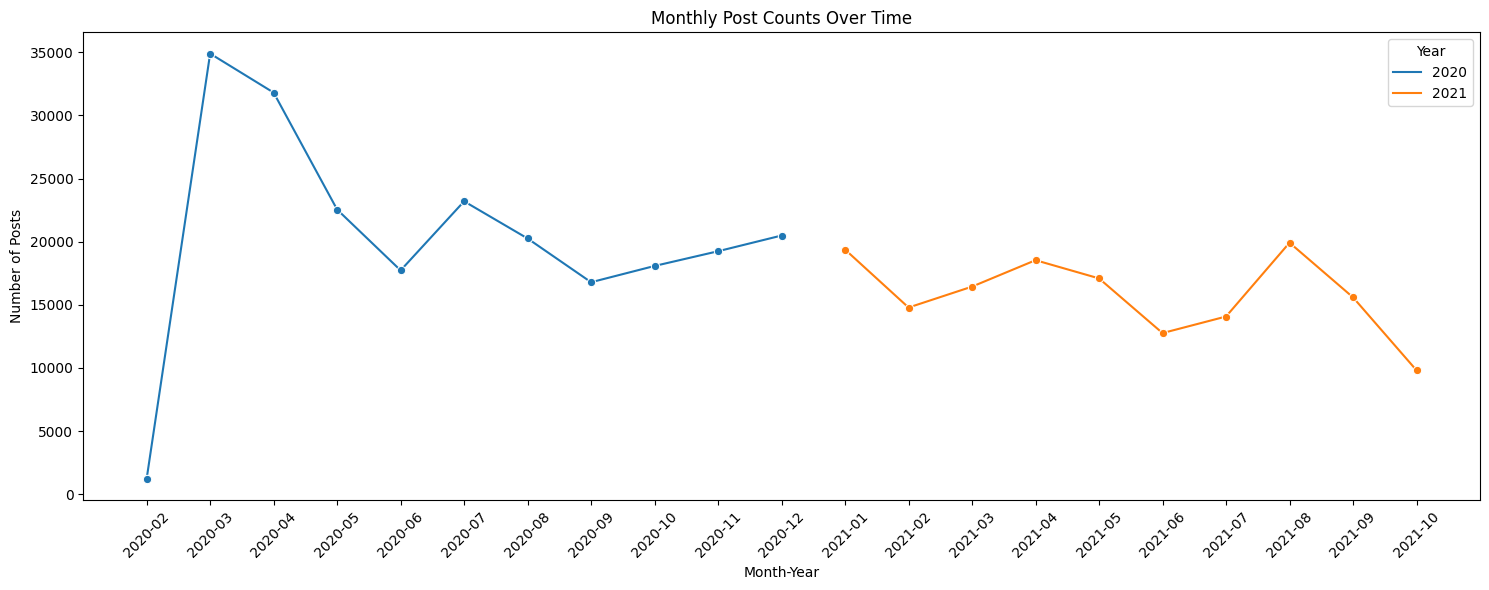

In [ ]:
# Creating 'month_year' column for plotting
monthly_counts['year'] = monthly_counts['year'].astype(str)
monthly_counts['month'] = monthly_counts['month'].astype(str).str.pad(2, fillchar='0')  # Padding single-digit months with a zero
monthly_counts['month_year'] = monthly_counts['year'] + '-' + monthly_counts['month']

# Sorting the data by 'month_year' to ensure correct plotting order
monthly_counts.sort_values(by='month_year', inplace=True)

# Plotting
plt.figure(figsize=(15, 6))
sns.lineplot(x='month_year', y='counts', hue='year', data=monthly_counts, marker='o')
plt.title('Monthly Post Counts Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.show()


Our intuition is confirmed: after the pandemic began in full-swing in March 2020, posts ultimately began to slow down. However, there do seem to have been peak months -- seemingly July 2020, December 2020-January 2021, April 2024, and August 2021.

This bodes with our knowledge of the pandemic: July 2020 was the beginning of the second wave, causing panic and increased conversation; the end of 2020 into the beginning of 2021 was when both the vaccine began to be finalized globally as well as when the Omicron variant was discovered; August was when the booster began to be pushed.

Let's see this more granuarly on a day level, looking for day-level peaks!

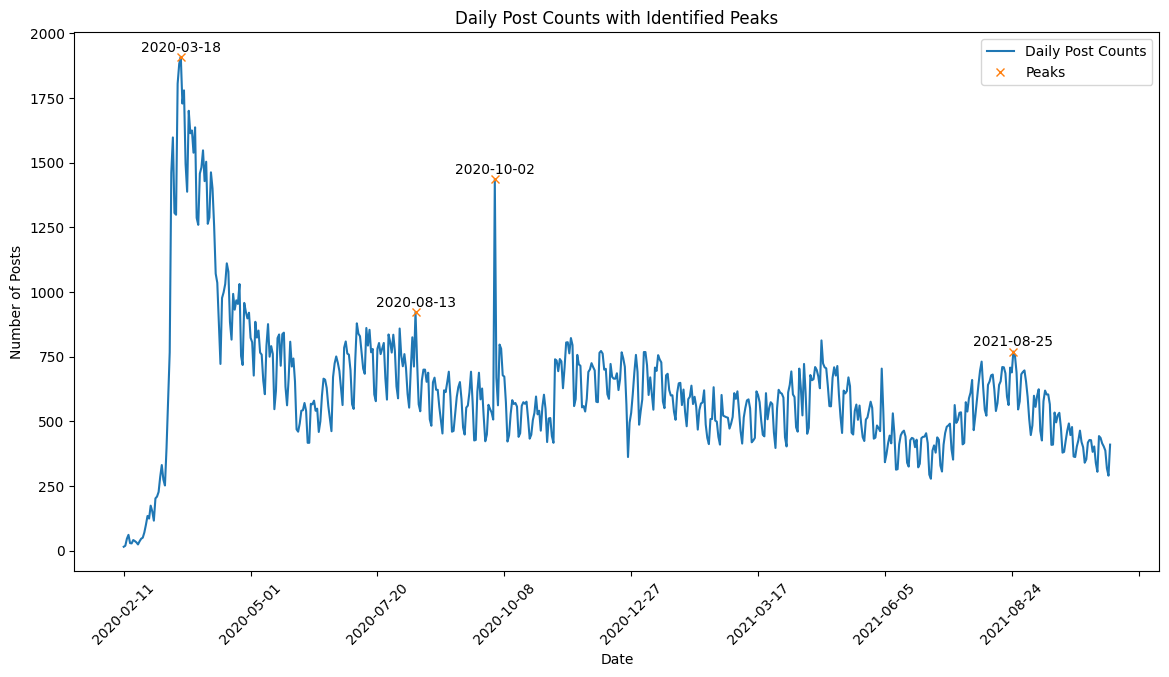

In [ ]:
# Lets investigate those peaks!
peaks, _ = find_peaks(daily_counts['counts'], prominence=475)

# Plotting the daily post counts
plt.figure(figsize=(14, 7))
plt.plot(daily_counts.ymd, daily_counts['counts'], label='Daily Post Counts')

# Plotting Xes onto peak days
plt.plot(daily_counts.ymd[daily_counts.index.isin(peaks)], daily_counts['counts'][peaks], "x", label='Peaks')
for peak in peaks:
    date = daily_counts.ymd[peak]
    plt.text(daily_counts.ymd[peak], daily_counts['counts'][peak] + 20, date, ha='center')

# Cleaning rest of graph
plt.title('Daily Post Counts with Identified Peaks')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=45)
plt.show()

From the data, we see peaks on March 18, 2020, August 13, 2020, October 2, 2020, and August 25, 2021.

Investigating using [The CDC's Covid Timeline](https://www.cdc.gov/museum/timeline/covid19.html), we see that:
1. On March 15, 2020 (3 days before the peak), states began to impose lockdowns, causing immense debate, confusion, and controversy.
2. On August 11, 2020 (two days before the peak), President Trump agreed to purchase $100M worth of vaccines from Moderna; On August 12, 2020 (one day before the peak -- and less famously, although perhaps meaningful to the reddit demographic of the world), it was found that obesity, even isolated from socioeconomic and demographic factors, increased Covid mortality.
3. On October 2, 2020 (day of peak), President Trump tested positive for Covid. 'Nuff said.
4. On August 23 (two days before the peak), the FDA approved the Pfizer vaccine.

Further investigation to confirm these hypotheses about the nature of the peaks is suggested for future study.


What about hour-level data though? Were people more likely to post at certain times of day? When are users on reddit?


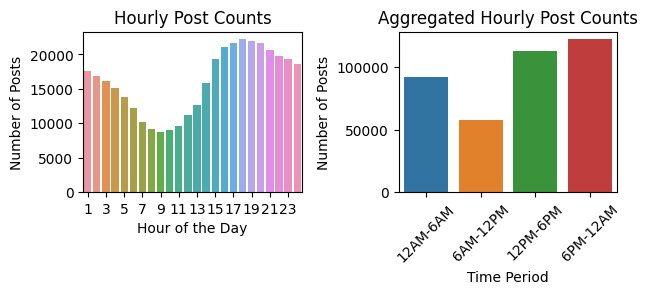

In [ ]:
# Investigating hour trend
plt.subplot(2, 2, 1)
sns.barplot(x=hourly_counts.hour.apply(lambda x: int(x) + 1), y=hourly_counts['counts'])
plt.title('Hourly Post Counts')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Posts')
plt.xticks(range(0, 24, 2), [str(i) for i in range(1, 25, 2)])

# Bucketing hours into periods
plt.subplot(2, 2, 2)
period_counts = period_counts.reindex(['12AM-6AM', '6AM-12PM', '12PM-6PM', '6PM-12AM'])
sns.barplot(x=period_counts.index, y=period_counts.values)
plt.title('Aggregated Hourly Post Counts')
plt.xlabel('Time Period')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Unsurprisingly, reddit traffic was highest during the night, with morning/day posts far less frequent!

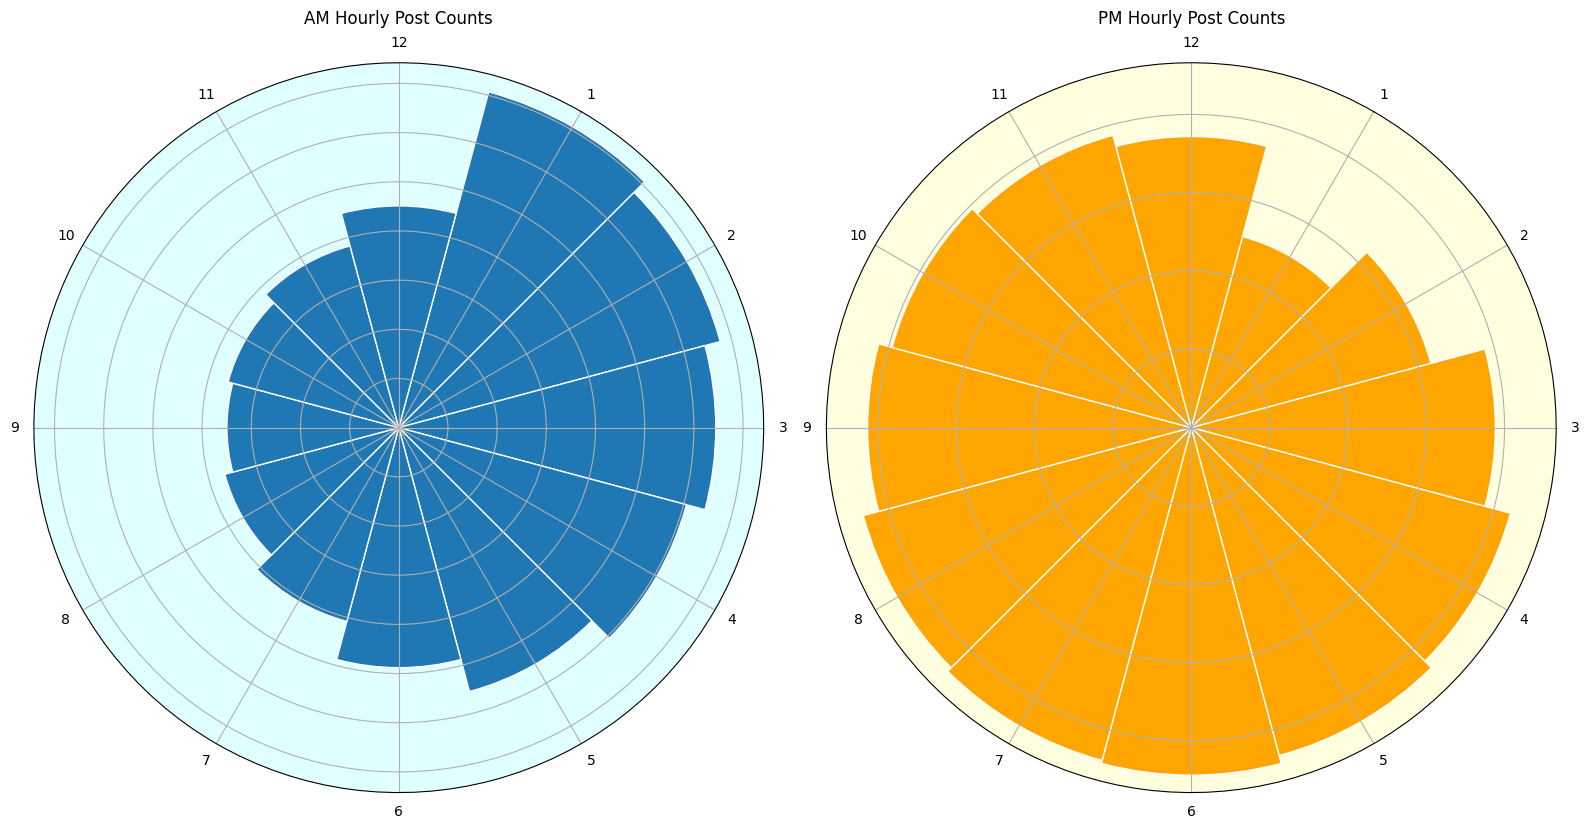

In [ ]:
# Visualizing as Clocks!

hourly_counts['hour_12'] = hourly_counts['hour'] % 12
hourly_counts['ampm'] = np.where(hourly_counts['hour'] < 12, 'AM', 'PM')

# Convert hour to radians for circular plotting
hourly_counts['radians'] = (hourly_counts['hour_12']/12) * 2 * np.pi

# Separate AM and PM for plotting
am_counts = hourly_counts[hourly_counts['ampm'] == 'AM']
pm_counts = hourly_counts[hourly_counts['ampm'] == 'PM']

fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': 'polar'}, figsize=(16, 8))

# AM Plot
ax1.bar(am_counts['radians'], am_counts['counts'], width=np.pi/6, edgecolor='white')
ax1.set_theta_zero_location('N', offset=-30)
ax1.set_theta_direction(-1)
ax1.set_xticks(np.linspace(0, 2 * np.pi, 12, endpoint=False))
ax1.set_xticklabels(range(1, 13))
ax1.set_title('AM Hourly Post Counts', va='bottom')

# PM Plot
ax2.bar(pm_counts['radians'], pm_counts['counts'], width=np.pi/6, edgecolor='white', color='orange')
ax2.set_theta_zero_location('N',offset=-30)
ax2.set_theta_direction(-1)
ax2.set_xticks(np.linspace(0, 2 * np.pi, 12, endpoint=False))
ax2.set_xticklabels(range(1, 13))
ax2.set_title('PM Hourly Post Counts', va='bottom')

# Removing the radial labels for a cleaner look
ax1.set_yticklabels([])
ax2.set_yticklabels([])

ax1.yaxis.grid(True)
ax2.yaxis.grid(True)
ax1.set_facecolor('lightcyan')
ax2.set_facecolor('lightyellow')
plt.tight_layout()
plt.show()

## **3.3** Subreddit Analysis:

### **3.3.1** Feature Engineering for EDA Purposes

In [ ]:
# Adding new word-based features to investigate how they bear on subreddits
tqdm.pandas(desc="Calculating length of selftext")
posts_df['len_selftext'] = posts_df.selftext.progress_apply(lambda x: len(x))

tqdm.pandas(desc="Counting words")
posts_df['num_words'] = posts_df.selftext.progress_apply(lambda x: len(x.split()))

tqdm.pandas(desc="Counting sentences")
posts_df['num_sentences'] = posts_df.selftext.progress_apply(lambda x: len(sent_tokenize(x)))

Counting sentences: 100%|██████████| 384673/384673 [01:39<00:00, 3865.75it/s]


### **3.3.2** Grouping data by Subreddit and Investigating

In [ ]:
# Grouping and creating aggregated variables of interest
subreddit_grouped = posts_df.groupby('subreddit.name').agg(
    num_posts=('id', 'size'),
    is_nsfw=('subreddit.nsfw', 'first'),
    mean_score=('score', 'mean'),
    min_score=('score', 'min'),
    max_score=('score', 'max'),
    tot_score=('score', 'sum'),
    mean_len=('len_selftext', 'mean'),
    mean_num_words=('num_words', 'mean'),
    mean_num_sents=('num_sentences', 'mean')
).reset_index().sort_values(by="num_posts", ascending=False).reset_index(drop=True)

subreddit_grouped['url'] = subreddit_grouped['subreddit.name'].apply(lambda x: f"https://www.reddit.com/r/{x}")

In [ ]:
# Investigating result
subreddit_grouped

,subreddit.name,num_posts,is_nsfw,mean_score,min_score,max_score,tot_score,mean_len,mean_num_words,mean_num_sents,url
0,autotldr,11269,0,1.884817,0,168,21240,2463.935132,268.238353,12.754193,https://www.reddit.com/r/autotldr
1,removalbot,8585,0,1.024927,0,6,8799,393.918229,32.679674,2.022714,https://www.reddit.com/r/removalbot
2,covid19positive,8469,0,21.460503,0,2423,181749,890.058330,164.771756,10.678947,https://www.reddit.com/r/covid19positive
3,conspiracy,7870,0,67.214104,0,10246,528975,1217.431385,182.017662,10.009911,https://www.reddit.com/r/conspiracy
4,askdocs,4584,0,8.237784,0,1454,37762,954.118019,173.907723,10.563482,https://www.reddit.com/r/askdocs
...,...,...,...,...,...,...,...,...,...,...,...
30495,nes,1,0,5.000000,5,5,5,655.000000,132.000000,5.000000,https://www.reddit.com/r/nes
30496,nerrel,1,0,6.000000,6,6,6,111.000000,22.000000,1.000000,https://www.reddit.com/r/nerrel
30497,nerdyjoy,1,0,4.000000,4,4,4,83.000000,13.000000,1.000000,https://www.reddit.com/r/nerdyjoy
30498,nerdist,1,0,45.000000,45,45,45,150.000000,28.000000,3.000000,https://www.reddit.com/r/nerdist


In [ ]:
# What abt looking at popular subreddits?
subreddit_grouped[subreddit_grouped.num_posts > 1000]

,subreddit.name,num_posts,is_nsfw,mean_score,min_score,max_score,tot_score,mean_len,mean_num_words,mean_num_sents,url
0,autotldr,11269,0,1.884817,0,168,21240,2463.935132,268.238353,12.754193,https://www.reddit.com/r/autotldr
1,removalbot,8585,0,1.024927,0,6,8799,393.918229,32.679674,2.022714,https://www.reddit.com/r/removalbot
2,covid19positive,8469,0,21.460503,0,2423,181749,890.058330,164.771756,10.678947,https://www.reddit.com/r/covid19positive
3,conspiracy,7870,0,67.214104,0,10246,528975,1217.431385,182.017662,10.009911,https://www.reddit.com/r/conspiracy
4,askdocs,4584,0,8.237784,0,1454,37762,954.118019,173.907723,10.563482,https://www.reddit.com/r/askdocs
5,legaladvice,4313,0,46.442847,0,19995,200308,1121.075817,205.792024,10.978205,https://www.reddit.com/r/legaladvice
6,teenagers,3379,0,35.189997,0,31385,118907,336.551051,62.829239,3.822137,https://www.reddit.com/r/teenagers
7,advice,3260,0,11.791104,0,7083,38439,1128.576687,214.461656,11.503681,https://www.reddit.com/r/advice
8,debaterightists,2773,0,0.990624,0,2,2747,498.769203,79.671836,5.805626,https://www.reddit.com/r/debaterightists
9,samplesize,2730,0,2.779487,0,257,7588,634.391209,84.951282,5.653480,https://www.reddit.com/r/samplesize


As we can see, there are few subreddits with more than 1000 covid posts, and only one -- `autotldr` -- with greater than 10k!

### **3.3.3** Subreddits by Number of Posts

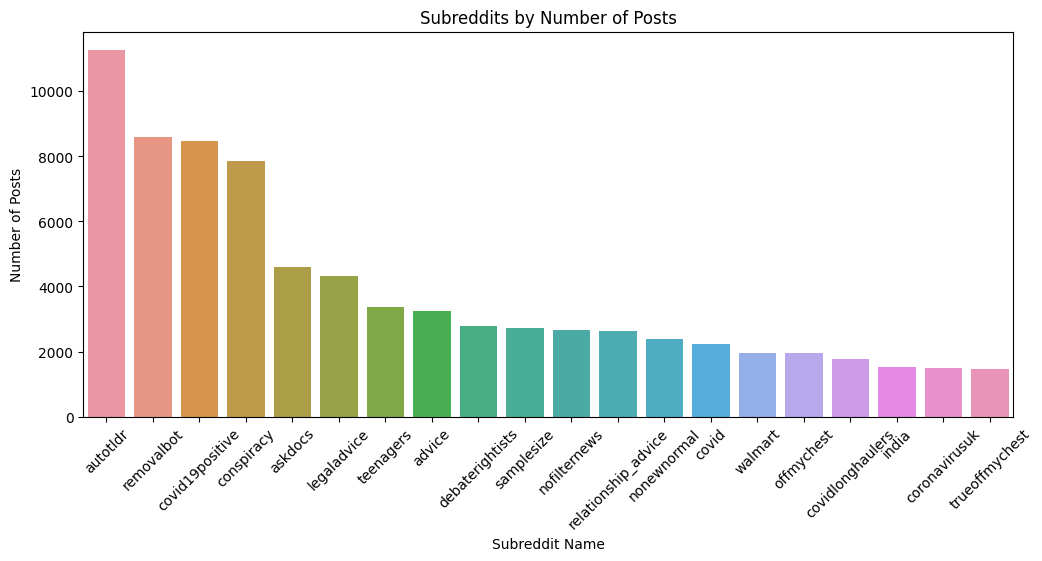

In [ ]:
# Plotting top 20 subreddits to see distribution of posts
plt.figure(figsize=(12, 5))
sns.barplot(x='subreddit.name', y='num_posts', data=subreddit_grouped.head(20))
plt.title('Subreddits by Number of Posts')
plt.xlabel('Subreddit Name')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.show()

It's interesting that although many of the subreddits with the most covid traffic were covid/health specific (e.g. `covid19positive`, `askdocs`, etc.), many are either general reddit-assistance subreddits (`autotldr` and `removalbot` leading the pack) or general advice/news subreddits (e.g. `conspiracy`, `legaladvice`, `teenagers`, etc.)

To explore these subreddits further, use the links below this cell block:

In [ ]:
def make_clickable(val):
    return f'<a href="{val}" target="_blank">{val}</a>'

# Apply the function to the 'url' column
subreddit_grouped['url'] = subreddit_grouped['url'].apply(make_clickable)

# Convert the DataFrame to an HTML object
html = subreddit_grouped[['subreddit.name', 'url']].head(20).to_html(escape=False)

# Display the HTML in the Colab notebook
from IPython.display import HTML
display(HTML(html))

,subreddit.name,url
0,autotldr,https://www.reddit.com/r/autotldr
1,removalbot,https://www.reddit.com/r/removalbot
2,covid19positive,https://www.reddit.com/r/covid19positive
3,conspiracy,https://www.reddit.com/r/conspiracy
4,askdocs,https://www.reddit.com/r/askdocs
5,legaladvice,https://www.reddit.com/r/legaladvice
6,teenagers,https://www.reddit.com/r/teenagers
7,advice,https://www.reddit.com/r/advice
8,debaterightists,https://www.reddit.com/r/debaterightists
9,samplesize,https://www.reddit.com/r/samplesize


### **3.3.4** Investigating Correlation between Features

Are the various features we've engineered about either the score  or the length of the post at all correlated with the number of posts per subreddit?  

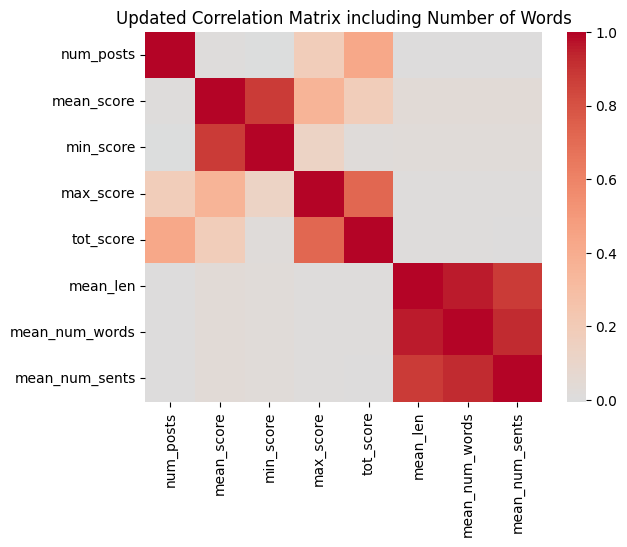

In [ ]:
# Creating corr matrix for relevant features
subreddit_corr = subreddit_grouped.drop(["subreddit.name", "url", "is_nsfw"], axis=1).corr()

# visualizing as heatmap
sns.heatmap(
    subreddit_corr,
    cmap='coolwarm',
    center=0.0
)
plt.title('Updated Correlation Matrix including Number of Words')
plt.show()

We observe a strong correlation among the score-based features (`mean_score`, `min_score`, `max_score`, `tot_score`), which could indicate that they are capturing similar dimensions of user engagement or post popularity. The lack of correlation between the number of posts and other features like `mean_num_words` or `mean_num_sents` suggests that the quantity of activity in a subreddit is independent of the complexity or length of the content.

Next steps would typically involve considering feature reduction to eliminate redundancy, and further analysis to understand the relationships between post activity and content characteristics.

## **3.4** Unsupervised Machine Learning: Topic Extraction from Selected Subreddits

Because our data is so large, it isn't feasible (at least with the CPU/GPU and time we have) to perform LDA topic extraction on the entire data set. And -- as there are so many different subreddits -- it is unlikely we would find meaningful thematic convergence. That said, for EDA purposes, we have chosen to extract topics from the very prominent `covid19positive` subreddit. In future work, we would extract from several more subreddits -- for now, given how long LDA tuning and modeling take, this should serve as representative.

### **3.4.1** Projecting `covid19positive` Topics

In [ ]:
c19p_df = posts_df[posts_df["subreddit.name"]=="covid19positive"]
c19p_df.shape[0]

8469

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
stop_words = stopwords.words('english')

# Function to tokenize the text for LDA input
def preprocess_tokenize(text):
  # remove symbols
  text = re.sub(r'[^\w\s]', '', text)
  text = text.lower()
  tokens = word_tokenize(text)
  tokens = [word for word in tokens if word not in stop_words]
  return tokens

c19p_df['tokens'] = c19p_df.selftext.apply(preprocess_tokenize)

### **3.4.2** Coherence Tuning to Pick Number of Topics

In [ ]:
# Defining the Corpus and DTM for the model
dic_1 = corpora.Dictionary(c19p_df['tokens'])
dtm = [dic_1.doc2bow(doc) for doc in c19p_df['tokens']]

# Before we build our LDA, we iterate thru various LDAs with different topic numbers
min_topics = 2
max_topics = 20
x_topics = range(min_topics, max_topics, 1)

# Calculating coherence for each LDA as metric to gauge best number of topics
coherence_value_list = []
model_list = []
for n in x_topics:
    print("tuning model with", n, "topics")
    lda_model = LdaMulticore(
        dtm,
        num_topics = n,
        id2word = dic_1,
        passes = 15,
        workers = 4,
        random_state=42
    )
    model_list.append(lda_model)
    coherence_model = CoherenceModel(model=lda_model, texts=c19p_df['tokens'], dictionary=dic_1, coherence='c_v')
    coherence_value_list.append(coherence_model.get_coherence())
    print("coherence calculated:", coherence_model.get_coherence())

tuning model with 2 topics
coherence calculated: 0.34915759443646616
tuning model with 3 topics
coherence calculated: 0.33514064836027574
tuning model with 4 topics
coherence calculated: 0.34228122124280447
tuning model with 5 topics
coherence calculated: 0.3311051298421537
tuning model with 6 topics
coherence calculated: 0.3227082258665085
tuning model with 7 topics
coherence calculated: 0.3296431667225816
tuning model with 8 topics
coherence calculated: 0.3413082906254664
tuning model with 9 topics
coherence calculated: 0.3421977443014546
tuning model with 10 topics
coherence calculated: 0.3434636537173418
tuning model with 11 topics
coherence calculated: 0.35968746602790314
tuning model with 12 topics
coherence calculated: 0.34504475330969403
tuning model with 13 topics
coherence calculated: 0.34625922702607015
tuning model with 14 topics
coherence calculated: 0.3506249294575473
tuning model with 15 topics
coherence calculated: 0.3418432529631759
tuning model with 16 topics
coherenc

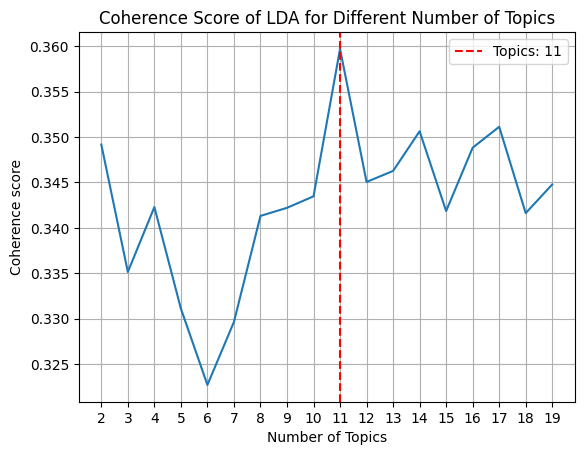

In [ ]:
# Plotting coherences
plt.plot(x_topics, coherence_value_list)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.title("Coherence Score of LDA for Different Number of Topics")
max_coherence_index = coherence_value_list.index(max(coherence_value_list))
max_coherence_topics = x_topics[max_coherence_index]
plt.axvline(x=max_coherence_topics, linestyle='--', color='red', label=f"Topics: {max_coherence_topics}")
plt.legend()
plt.xticks(x_topics)
plt.grid(True)
plt.show()

We see from this visualization that while 11 topics may offer the best coherence technically speaking, it does not practically much better than 2 topics -- and perhaps significantly less interpretable. Let's investigate both:

### **3.4.3** Visualizing LDA

In [ ]:
# Adding some more imports to enable pyLDAvis that modify the version of Pandas,
# so saving them for here rather than running at the beginning of the notebook
!pip install pyldavis
!pip install pandas==1.5.3
import pyLDAvis
import pyLDAvis.lda_model
pyLDAvis.enable_notebook()

In [ ]:
# Defining our vectorizer, matrix, and LDA model and then fitting the model
bow_vectorizer = CountVectorizer(lowercase=True, max_df=0.5, min_df=10)
bow_matrix = bow_vectorizer.fit_transform(c19p_df['tokens'].apply(' '.join))
lda_11 = LDA(n_components=11, random_state=42)
lda_11.fit(bow_matrix)
pyLDAvis.lda_model.prepare(lda_11, bow_matrix, bow_vectorizer)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.176552 -0.004750       1        1  15.357841
7      0.018121 -0.023596       2        1  11.971161
1     -0.063198  0.121418       3        1  11.925490
3     -0.057588  0.140758       4        1  11.480457
6      0.048300 -0.032293       5        1   9.952943
9     -0.062700  0.045545       6        1   8.962337
2      0.005671  0.006656       7        1   7.757014
10     0.063543 -0.034287       8        1   7.436477
8     -0.167932  0.021373       9        1   7.366717
4      0.234112 -0.046017      10        1   4.631094
0     -0.194881 -0.194807      11        1   3.158469, topic_info=        Term         Freq        Total Category  logprob  loglift
4041  throat  2768.000000  2768.000000  Default  30.0000  30.0000
3638   smell  3725.000000  3725.000000  Default  29.0000  29.0000
3955   taste  3146.000000  3146.000000  Default  28.0000  28.0000
1163     day  7552.000000  7552.000000  Default  27.0000  27.0000
3682    sore  1837.000000  1837.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
1082   could   110.422854  2239.935870  Topic11  -5.2341   0.4452
1313  doctor   100.519344  1323.428413  Topic11  -5.3281   0.8775
2249    know   110.125576  3059.151316  Topic11  -5.2368   0.1308
3942    take    97.517439  1771.415320  Topic11  -5.3584   0.5556
2881  people    95.495846  2324.894509  Topic11  -5.3793   0.2627

[879 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
4         1  0.105791  1000mg
4         8  0.846331  1000mg
5         1  0.958388    1001
8         1  0.950298    1003
9         1  0.862573    1004
...     ...       ...     ...
4509      1  0.094690    zinc
4509      6  0.004117    zinc
4509      8  0.860440    zinc
4509     11  0.037052    zinc
4514      8  0.966017  zyrtec

[3356 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 8, 2, 4, 7, 10, 3, 11, 9, 5, 1])

Clearly, 11 is far too many topics, as we can see visually that they overlap significantly!

In [ ]:
lda_2 = LDA(n_components=2, random_state=42)
lda_2.fit(bow_matrix)
pyLDAvis.lda_model.prepare(lda_2, bow_matrix, bow_vectorizer)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.087373  0.0       1        1  50.737698
1     -0.087373  0.0       2        1  49.262302, topic_info=         Term         Freq        Total Category  logprob  loglift
1163      day  7625.000000  7625.000000  Default  30.0000  30.0000
1610    fever  4054.000000  4054.000000  Default  29.0000  29.0000
1078    cough  3337.000000  3337.000000  Default  28.0000  28.0000
4041   throat  2742.000000  2742.000000  Default  27.0000  27.0000
2824     pain  2072.000000  2072.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
1789  getting  1330.408436  2292.395484   Topic2  -5.4923   0.1639
1807       go  1332.982746  2442.718178   Topic2  -5.4903   0.1023
3195   really  1332.825988  2644.219261   Topic2  -5.4904   0.0229
1082    could  1260.596901  2238.588552   Topic2  -5.5462   0.1338
3786    still  1421.306903  4852.998601   Topic2  -5.4262  -0.5200

[207 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
279       1  0.997643       98
279       2  0.007734       98
327       1  0.985473    aches
327       2  0.014794    aches
403       1  0.016937  allowed
...     ...       ...      ...
4449      2  0.980013  workers
4455      1  0.022090    world
4455      2  0.979310    world
4467      1  0.328578    would
4467      2  0.671408    would

[332 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

Meanwhile, 2 topics seem like a great choice, as it has no overlap and is easily interpretable

Topic 1: "Symptoms Identification" – Characterized by terms frequently associated with illness symptoms, such as "cough," "fever," and "throat." The presence of "tested" and "positive" within the top terms suggests a focus on diagnostic outcomes, specifically pertaining to COVID-19.

Topic 2: "Impact Analysis" – This topic expands beyond health symptoms, encompassing terms like "work," "home," and "family," combined with "tested" and "positive." These terms suggest an exploration into the broader effects of COVID-19 on daily life and societal functions.

From this Unsupervised ML, we have buttressed our intuitions that the `covid19positive` subreddit involves both short-term symptom / day-to-day talk as well as long-term impact-on-life conversation. Future work should continue this topic extraction to the rest of the prominent subreddits!

# **Part 4.** Feature Engineering

In this section we will be artificially engineering new features for our dataset, ones that we suspect may play a role in `score` results.

In [ ]:
# Removing stopwords for sentiment analysis
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    filtered_text = ' '.join([word for word in word_tokens if word not in stop_words])
    return filtered_text

posts_df['cleaned_english'] = posts_df['selftext'].apply(remove_stopwords)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Get the sentiment score and put in column labeled "sentiment_score"
sia = SentimentIntensityAnalyzer()

def determine_sentiment(text):
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores['compound']

posts_df['sentiment_score'] = posts_df['cleaned_english'].apply(determine_sentiment)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Pull out unique words ratio (Measure of uniqueness and repetition in text)
def unique_word_ratio(text):
    words = text.split()
    unique_words = set(words)
    return len(unique_words) / len(words) if words else 0

posts_df['unique_word_ratio'] = posts_df['selftext'].apply(unique_word_ratio)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Calculate average sentence length for each row
posts_df['average_sentence_length'] = posts_df["num_words"] / posts_df["num_sentences"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Merging subreddit volume data
posts_df = posts_df.merge(subreddit_grouped[["subreddit.name", "num_posts"]], on="subreddit.name")

# Standardize the num_posts column
scaler = StandardScaler()
posts_df['subreddit_size_score'] = scaler.fit_transform(posts_df[['num_posts']])
posts_df = posts_df.drop(columns=["num_posts"], axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


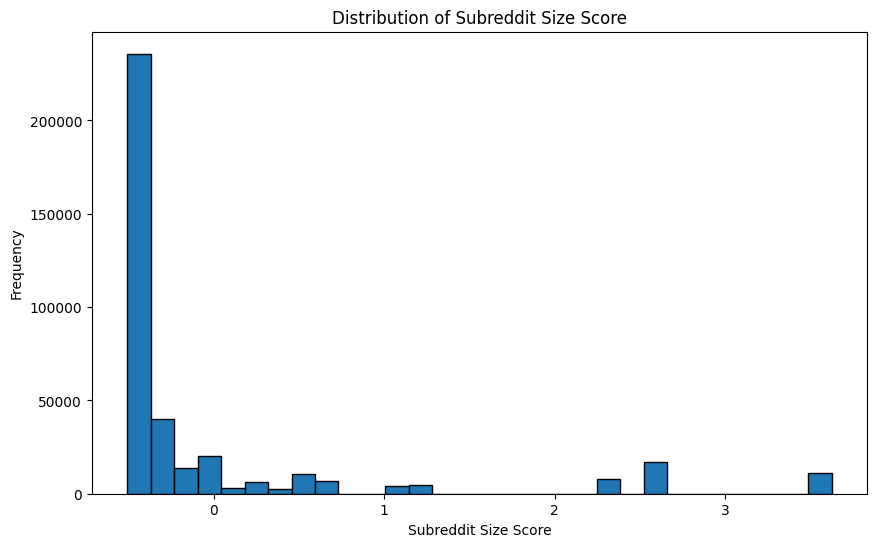

In [ ]:
# Graphing distribution of standardized subreddit score
plt.figure(figsize=(10, 6))
plt.hist(posts_df.subreddit_size_score, bins=30, edgecolor='black')
plt.title('Distribution of Subreddit Size Score')
plt.xlabel('Subreddit Size Score')
plt.ylabel('Frequency')
plt.show()

# **Part 5.** Model Building!

We sourced three models from lecture: Linear, Random Forest, and FNN.

One of the most simple models to build is a Linear Regression. While this model is overly simplistic and is unlikely to provide accurate predictions for such complicated relationships it can still be informative to see how much information can be pulled out based on this regression alone.

Thus, we will train a Linear Regression as our baseline model

Our data has the following features:
  1. `year`
  2. `month`
  3. `day`
  4. `hour`
  5. `len_selftext`
  6. `num_words`
  7. `num_sentences`
  8. `sentiment_score`
  9. `unique_word_ratio`
  10. `average_sentence_length`
  11. `subreddit_size_score`

## **5.1** Baseline Model - Linear Regression**

In [ ]:
# Assuming 'score' is your target variable
X = posts_df[["year",	"month",	"day", "hour", "len_selftext",	"num_words",	"num_sentences",	"sentiment_score", "unique_word_ratio",	"average_sentence_length", "subreddit_size_score"]]
y = posts_df['score']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and Residuals
y_pred = model.predict(X_test)
residuals = y_test - y_pred

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


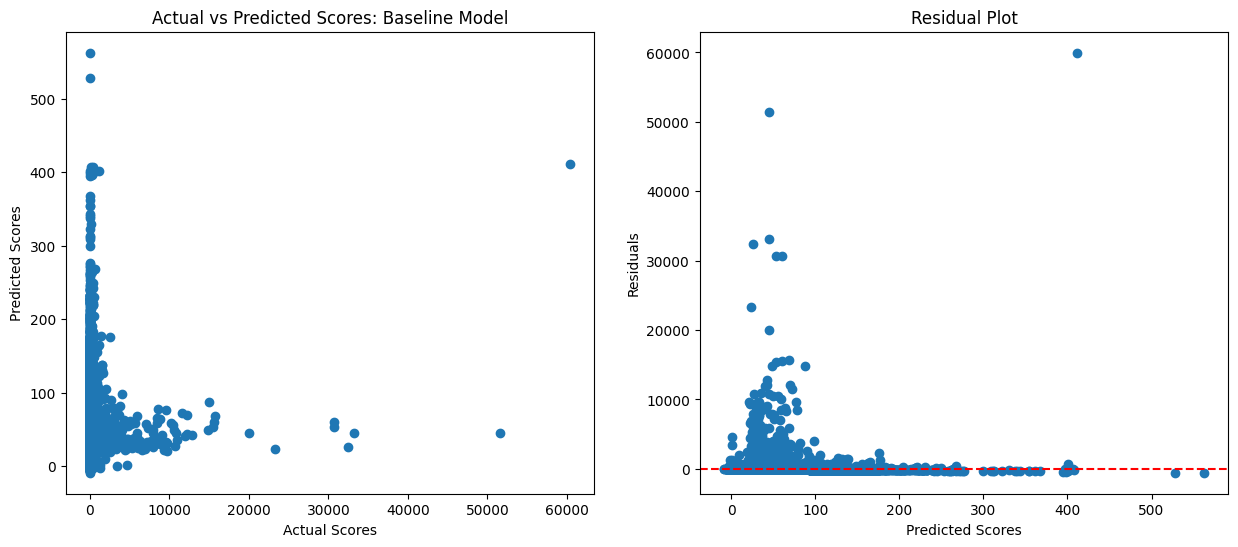

In [ ]:
# Creating subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plotting Actual vs Predicted Scores
axs[0].scatter(y_test, y_pred)
axs[0].set_xlabel('Actual Scores')
axs[0].set_ylabel('Predicted Scores')
axs[0].set_title('Actual vs Predicted Scores: Baseline Model')

# Plotting Residual Plot
axs[1].scatter(y_pred, residuals)
axs[1].set_xlabel('Predicted Scores')
axs[1].set_ylabel('Residuals')
axs[1].set_title('Residual Plot: Baseline Model')
axs[1].axhline(y=0, color='red', linestyle='--')

# Display the subplots
plt.show()

The actual-vs-predicted plot pattern suggests a nonlinear relationship between the features and the target variable, as the model underpredicts for higher values of the actual score.
The residual plot indicates heteroscedasticity, as the residuals increase with the magnitude of the predicted score, which should not happen in a well-behaved linear regression model.

To attempt to remedy this, we can't use Lasso/Ridge as those hyperparameter tuning methods remedy overfitting. However, we can try scaling the features and applying a power transformation (Yeo-Johnson method) to the target variable within a pipeline!

Before we start, let's print our baseline RMSE and R2 as benchmarks:

In [ ]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')
print(f'Mean Absolute Error (MAE): {mae}')

Root Mean Squared Error (RMSE): 483.0805483364889
R-squared (R²): 0.0030456424340603583
Mean Absolute Error (MAE): 57.48306518190306


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


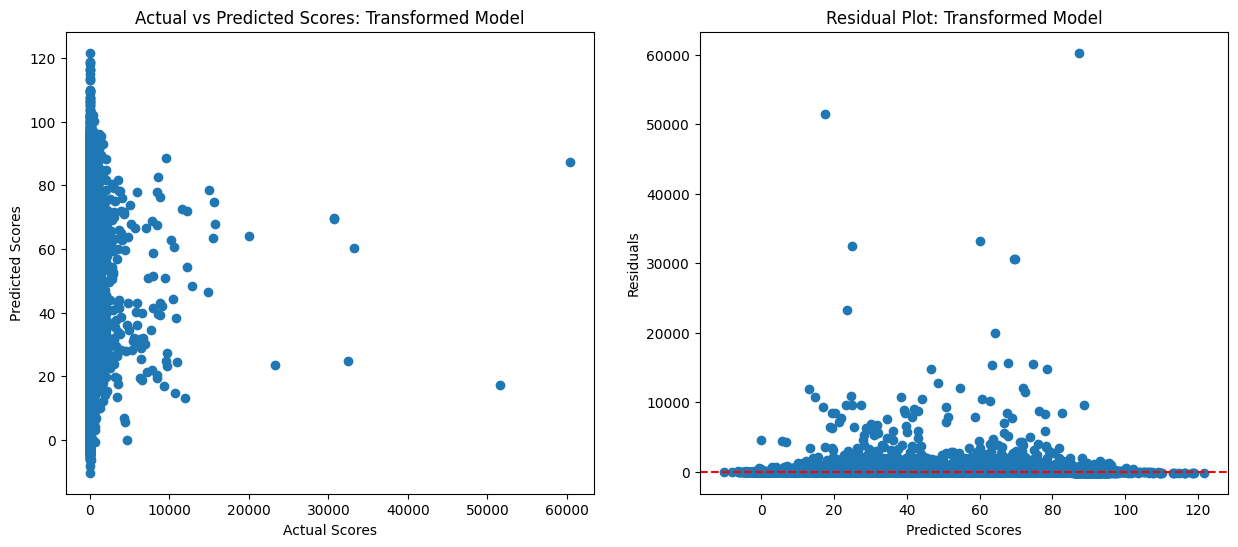

In [ ]:
# Pipeline with scaling and power transformation
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('power_transform', PowerTransformer(method='yeo-johnson')),
    ('model', LinearRegression())
])

# Fitting and Training
pipeline.fit(X_train, y_train)
y_pred_transformed = pipeline.predict(X_test)
residuals_transformed = y_test - y_pred_transformed

# Creating subplots for the transformed model
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plotting Actual vs Predicted Scores after transformation
axs[0].scatter(y_test, y_pred_transformed)
axs[0].set_xlabel('Actual Scores')
axs[0].set_ylabel('Predicted Scores')
axs[0].set_title('Actual vs Predicted Scores: Transformed Model')

# Plotting Residual Plot after transformation
axs[1].scatter(y_pred_transformed, residuals_transformed)
axs[1].set_xlabel('Predicted Scores')
axs[1].set_ylabel('Residuals')
axs[1].set_title('Residual Plot: Transformed Model')
axs[1].axhline(y=0, color='red', linestyle='--')

# Display the subplots
plt.show()

In [ ]:
# Calculating metrics for the transformed model
rmse_transformed = sqrt(mean_squared_error(y_test, y_pred_transformed))
r2_transformed = r2_score(y_test, y_pred_transformed)
mae_transformed = mean_absolute_error(y_test, y_pred_transformed)

print(f'Root Mean Squared Error (RMSE): {rmse_transformed}')
print(f'R-squared (R²): {r2_transformed}')
print(f'Mean Absolute Error (MAE): {mae_transformed}')

Root Mean Squared Error (RMSE): 483.5198962940064
R-squared (R²): 0.0012314148027838812
Mean Absolute Error (MAE): 57.79284066407137


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Clearly, the scaling and transforming didn't help much. Our RMSE and R2 values are nearly identical (and in fact a bit worse). Notably, our MAE (a metric more useful for long-tail distributions) is one lower. Perhaps we are making subtle progress.

Linear regression was valuable as our baseline model for its simplicity and interpretability. However, especially since our data perhaps seems nonlinear and heteroscedastic, it's not the best model for performance purposes (since it assumes linearity and homoscedasticity).

Therefore, we will train two more complex models. First, a Random Forest: RFs are less interpretable than linear regression but can offer significant improvement in handling complex datasets. They provide a balance between predictive power and interpretability, especially with techniques like feature importance scores which aid in understanding the model's decisions.

Then, we will train a Feedforward Neural Net: FNNs are at the higher end of the spectrum in terms of predictive power but low on interpretability. They are often considered 'black-box' models, making it challenging to understand the exact nature of their decision-making process. This trade-off is often acceptable in scenarios where predictive accuracy is paramount, and the complexity of the data exceeds the capacity of simpler models.

Hopefully these models will offer significant improvement to justify the decrease in interpretability.


## **5.2** Random Forest Model

In [ ]:
# Hyperparameter tuning -- sampling data to do so as tuning on entire df
# crashes runtime (even after extensive efforts to supplement GPU etc)
sampled_data = posts_df.sample(frac=0.1, random_state=42)

# Define features and target for the sampled data
X_sample = sampled_data[["year",	"month",	"day", "hour", "len_selftext",	"num_words",	"num_sentences",	"sentiment_score", "unique_word_ratio",	"average_sentence_length", "subreddit_size_score"]]
y_sample = sampled_data['score']

# Split the sampled data
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 5, 10],
    'min_samples_split': [50, 100],
    'min_samples_leaf': [25, 50],
    'max_features': ['sqrt', 'log2']
}

# Create the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Instantiate Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit Grid Search to the sample data
grid_search.fit(X_train_sample, y_train_sample)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 50}


In [ ]:
# Run it on the whole model
rf_model_full = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    n_jobs=-1,
    random_state=42
)

# Fit the model on full training data
rf_model_full.fit(X_train, y_train)
y_pred_rf = rf_model_full.predict(X_test)
residuals_rf = y_test - y_pred_rf

# Evaluate the model on full test data
rmse_rf = sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f'Root Mean Squared Error (RMSE): {rmse_rf}')
print(f'R-squared (R²): {r2_rf}')
print(f'Mean Absolute Error (MAE): {mae_rf}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Root Mean Squared Error (RMSE): 482.77329858175176
R-squared (R²): 0.004313408531111174
Mean Absolute Error (MAE): 56.583580679104905


Although not by much, the RF has improved our performance! Let's visualize:

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


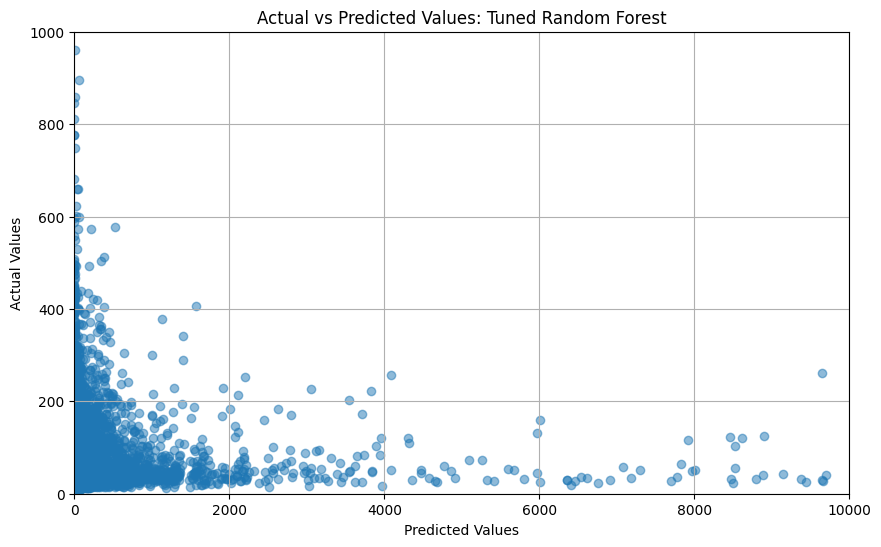

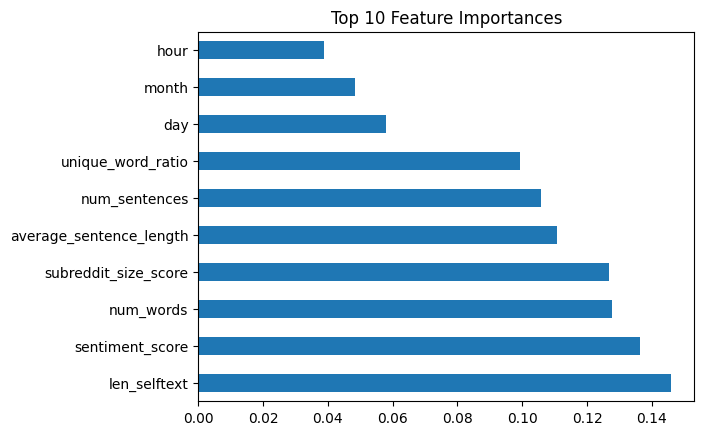

In [ ]:
# Actual vs Predicted Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.title('Actual vs Predicted Values: Tuned Random Forest')
# Restricting axes for more interpretable plot
plt.xlim(0, 10000)
plt.ylim(0, 1000)

plt.grid(True)
plt.show()

# Feature Importance Plot
feature_importances = pd.Series(rf_model_full.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()

The graphic is helpful for indicating that while we saw a minor improvement, a lot more work needs to be done. What is interesting, though, is the Rf's assessment of the most important features. We believe -- as we will explain in our presentation -- that the model's underperformance suffers from lack of better features: evidently, there are other pieces of data that affect `score` upon which we have not trained. **Further work should investigate further feature engineering!**

However, a hint may lie in the RF's important feature plot. It suggests that text length and text sentiment are more important than the meta-features about the text and when it was posted. Perhaps further content analysis of the text's actual meaning is warranted -- we would assume intuitively that this is the key driver in traction.

## **5.3** FNN Model

In [ ]:
# Scaling features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Create a Sequential model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Another Dropout layer
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
history = model.fit(X_train_scaled, y_train, epochs=15, batch_size=32, validation_split=0.2, verbose=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch 1/15
7694/7694 [==============================] - 43s 4ms/step - loss: 373083.3438 - val_loss: 153902.3750
Epoch 2/15
7694/7694 [==============================] - 37s 5ms/step - loss: 372916.3750 - val_loss: 154109.1875
Epoch 3/15
7694/7694 [==============================] - 34s 4ms/step - loss: 372982.1250 - val_loss: 153928.9062
Epoch 4/15
7694/7694 [==============================] - 33s 4ms/step - loss: 372892.4062 - val_loss: 153880.0938
Epoch 5/15
7694/7694 [==============================] - 34s 4ms/step - loss: 372908.0625 - val_loss: 153951.7969
Epoch 6/15
7694/7694 [==============================] - 33s 4ms/step - loss: 372922.2500 - val_loss: 154097.6094
Epoch 7/15
7694/7694 [==============================] - 33s 4ms/step - loss: 372916.2188 - val_loss: 153906.9844
Epoch 8/15
7694/7694 [==============================] - 33s 4ms/step - loss: 372815.8750 - val_loss: 153934.2969
Epoch 9/15
7694/7694 [==============================] - 34s 4ms/step - loss: 372817.5312 - val_l

It is strange that the losses increase between some epochs. And their size is so high! Before we even evaluate the model, it would behoove us to try lowering the learning rate and scaling the target to account for these problems:

In [ ]:
from tensorflow.keras.optimizers import Adam

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Sequential model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Another Dropout layer
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer

# Custom learning rate to try dealing w increased losses
adam = Adam(learning_rate=0.001)

model.compile(optimizer=adam, loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train_scaled, epochs=15, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


7694/7694 [==============================] - 38s 5ms/step - loss: 1.1346 - val_loss: 0.4679
Epoch 2/15
7694/7694 [==============================] - 34s 4ms/step - loss: 1.1325 - val_loss: 0.4690
Epoch 3/15
7694/7694 [==============================] - 33s 4ms/step - loss: 1.1326 - val_loss: 0.4675
Epoch 4/15
7694/7694 [==============================] - 33s 4ms/step - loss: 1.1326 - val_loss: 0.4672
Epoch 5/15
7694/7694 [==============================] - 32s 4ms/step - loss: 1.1325 - val_loss: 0.4673
Epoch 6/15
7694/7694 [==============================] - 31s 4ms/step - loss: 1.1325 - val_loss: 0.4671
Epoch 7/15
7694/7694 [==============================] - 35s 4ms/step - loss: 1.1325 - val_loss: 0.4675
Epoch 8/15
7694/7694 [==============================] - 32s 4ms/step - loss: 1.1325 - val_loss: 0.4691
Epoch 9/15
7694/7694 [==============================] - 32s 4ms/step - loss: 1.1326 - val_loss: 0.4679
Epoch 10/15
7694/7694 [==============================] - 31s 4ms/step - loss: 1.1324

In [ ]:
y_pred_scaled = model.predict(X_test_scaled)

# Inverse transform the predictions to original scale
y_pred_fnn = scaler_y.inverse_transform(y_pred_scaled)

# Calculate metrics
rmse_fnn = sqrt(mean_squared_error(y_test, y_pred_fnn))
r2_fnn = r2_score(y_test, y_pred_fnn)
mae_fnn = mean_absolute_error(y_test, y_pred_fnn)

print(f'Root Mean Squared Error (RMSE): {rmse_fnn}')
print(f'R-squared (R²): {r2_fnn}')
print(f'Mean Absolute Error (MAE): {mae_fnn}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2405/2405 [==============================] - 5s 2ms/step
Root Mean Squared Error (RMSE): 483.37845560712117
R-squared (R²): 0.00181565488870572
Mean Absolute Error (MAE): 57.237015632986456


Evidently, the FNN actually performed worse than the RF! Future work should thus continue from the progress that we have made with the RF.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


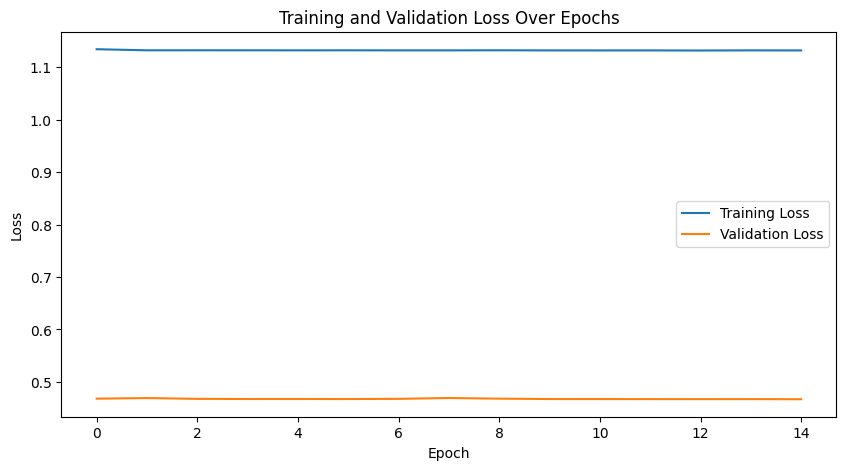

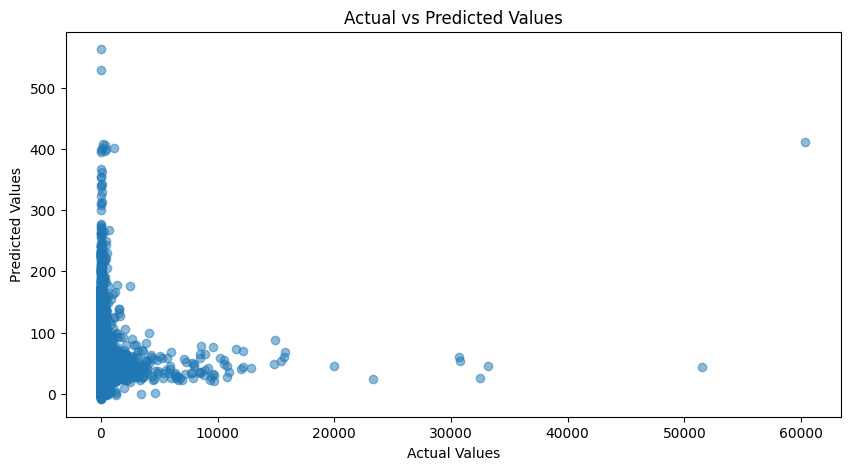

In [ ]:
# Plot training & validation loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot actual vs predicted scores
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# **Part 6.** Concluding Comments

This final data project, aimed at predicting upvotes on Reddit posts, has thankfully produced some modestly insightful and promising results, particularly with the random forest (RF) model. Although the challenge of accurately forecasting social media engagement proved significant, the RF model emerged as the marginally superior approach compared to linear regression and feedforward neural networks (FNN). This success, is most probably due to the careful work that went into feature selection and model tuning, leveraging various packages and techniques discussed in class and EDA beforehand.

By focusing on the textual content of Reddit posts, we were able to extract a rich set of features that proved to be more influential in predicting upvotes than temporal factors including sentiment score and the length of the text. The utilization of advanced text analysis techniques and the application of learned packages let us get deep into the nuances of post content as shown from the various interactive charts.

Looking forward, future work can expand on specifically the RF by integrating even more sophisticated natural language processing (NLP) techniques and exploring the potential of deep learning models, which could offer a more nuanced understanding of the factors driving user engagement on Reddit.

Additionally, the insights gained from this project about the importance of text content in predicting upvotes open up new avenues for exploring user behavior on social media platforms. By continuing to refine our models and expand our feature set, we can aim to not only improve the accuracy of our predictions but also gain a deeper understanding of the dynamics at play in online communities.

In essence, this project, with its modest yet important successes, has set the stage for exciting future work. The journey ahead in the world of social media analytics is filled with places for innovation and discovery, and our experiences and learnings from this project will hopefully serve as a valuable guide.